In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df_imdb = pd.read_excel("imdb_cleaned.xlsx", index_col=0)
df_imdb

,season,episode,episode_serie,title,summaries,airdates,ratings,total_votes,links,date_imdb
0,S1,E1,1,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,17 Dec. 1989,8.1,7529,https://www.imdb.com/title/tt0348034/,1989-12-17
1,S1,E2,2,Bart the Genius,Bart ends up at a school for gifted children a...,14 Jan. 1990,7.7,5015,https://www.imdb.com/title/tt0756593/,1990-01-14
2,S1,E3,3,Homer's Odyssey,"After losing his job, Homer contemplates endin...",21 Jan. 1990,7.3,4427,https://www.imdb.com/title/tt0701124/,1990-01-21
3,S1,E4,4,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,28 Jan. 1990,7.7,4353,https://www.imdb.com/title/tt0756399/,1990-01-28
4,S1,E5,5,Bart the General,After being beaten up by Nelson Muntz one too ...,4 Feb. 1990,7.9,4687,https://www.imdb.com/title/tt0701059/,1990-02-04
...,...,...,...,...,...,...,...,...,...,...
722,S33,E18,723,My Octopus and a Teacher,Bart has romantic feelings for his new teacher,24 Apr. 2022,6.6,348,https://www.imdb.com/title/tt14458056/,2022-04-24
723,S33,E19,724,Girls Just Shauna Have Fun,Lisa finds an unlikely mentor in Shauna Chalme...,1 May 2022,6.6,325,https://www.imdb.com/title/tt14458070/,2022-05-01
724,S33,E20,725,Marge the Meanie,Marge bonds with Bart when she discovers a sec...,8 May 2022,6.7,301,https://www.imdb.com/title/tt14458078/,2022-05-08
725,S33,E21,726,Meat Is Murder,Grampa reconnects with an old associate in the...,15 May 2022,5.8,335,https://www.imdb.com/title/tt14458098/,2022-05-15


## Nb d'occurences des membres de la famille Simpson dans les titres et résumés des épisodes

In [3]:
nb_homer_title = df_imdb["title"].str.contains('Homer').value_counts().loc[True]
nb_homer_title

56

In [4]:
nb_marge_title = df_imdb["title"].str.contains('Marge').value_counts().loc[True]
nb_marge_title

23

In [5]:
nb_bart_title = df_imdb["title"].str.contains('Bart').value_counts().loc[True]
nb_bart_title

48

In [6]:
nb_lisa_title = df_imdb["title"].str.contains('Lisa').value_counts().loc[True]
nb_lisa_title

42

In [7]:
nb_maggie_title = df_imdb["title"].str.contains('Maggie').value_counts().loc[True]
nb_maggie_title

3

In [8]:
nb_famille_title = [nb_homer_title, nb_marge_title, nb_bart_title, nb_lisa_title, nb_maggie_title]
nb_famille_title

[56, 23, 48, 42, 3]

In [9]:
nb_homer_summary = df_imdb["summaries"].str.contains('Homer').value_counts().loc[True]
nb_homer_summary

407

In [10]:
nb_marge_summary = df_imdb["summaries"].str.contains('Marge').value_counts().loc[True]
nb_marge_summary

181

In [11]:
nb_bart_summary = df_imdb["summaries"].str.contains('Bart').value_counts().loc[True]
nb_bart_summary

260

In [12]:
nb_lisa_summary = df_imdb["summaries"].str.contains('Lisa').value_counts().loc[True]
nb_lisa_summary

205

In [13]:
nb_maggie_summary = df_imdb["summaries"].str.contains('Maggie').value_counts().loc[True]
nb_maggie_summary

25

In [14]:
nb_famille_summary = [nb_homer_summary, nb_marge_summary, nb_bart_summary, nb_lisa_summary, nb_maggie_summary]
nb_famille_summary

[407, 181, 260, 205, 25]

In [15]:
mb_famille = ["Homer", "Marge", "Bart", "Lisa", "Maggie"]

In [16]:
df_famille = pd.DataFrame(mb_famille)
df_famille["nb_in_title"] = nb_famille_title
df_famille["nb_in_summary"] = nb_famille_summary
df_famille = df_famille.sort_values(by=['nb_in_title'], ascending=False)
df_famille

,0,nb_in_title,nb_in_summary
0,Homer,56,407
2,Bart,48,260
3,Lisa,42,205
1,Marge,23,181
4,Maggie,3,25


In [17]:
print(df_famille.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>nb_in_title</th>
      <th>nb_in_summary</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Homer</td>
      <td>56</td>
      <td>407</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Bart</td>
      <td>48</td>
      <td>260</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Lisa</td>
      <td>42</td>
      <td>205</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Marge</td>
      <td>23</td>
      <td>181</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Maggie</td>
      <td>3</td>
      <td>25</td>
    </tr>
  </tbody>
</table>


## Analyses démographiques par sexe

In [18]:
df_characters = pd.read_csv("simpsons_characters.csv")
df_characters

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN
...,...,...,...,...
6717,5222,Ron Rabinowitz,ron rabinowitz,m
6718,5728,Martha Stewart,martha stewart,f
6719,1770,Officer Goodman,officer goodman,m
6720,1634,Evan Conover,evan conover,m


In [19]:
df_characters['id'].nunique()

6722

In [20]:
gender_repartition = df_characters["gender"].value_counts().to_frame()
gender_repartition

,gender
m,252
f,71


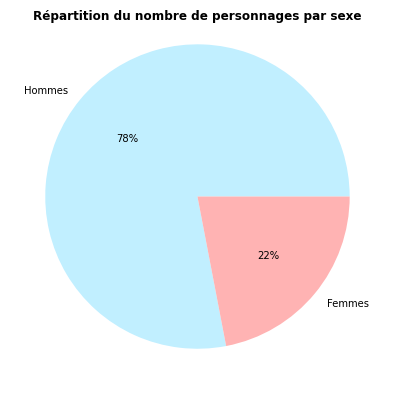

In [21]:
labels = ['Hommes','Femmes']

gender_repartition.plot.pie(y='gender', figsize=(7, 7), autopct='%1.0f%%', labels=labels, colors = ['#C1EFFF', '#FFB3B3'])

plt.ylabel('')
ax = plt.subplot(111)
ax.get_legend().remove()

plt.title('Répartition du nombre de personnages par sexe', x=0.5, y=0.95, fontweight="bold")

#plt.savefig('nb_gender.png')

plt.show()

## Analyses démographiques par âge

In [22]:
df_characters_age = pd.read_csv("simpsons_characters_age.csv", index_col=0)
df_characters_age

,characters,categ
0,"""Something New"" Spuckler Baby",Babies
1,Bart and Darcy's baby,Babies
2,Baby Bear,Babies
3,Bouncing Battle Baby,Babies
4,Axel Bouvier,Babies
...,...,...
483,Zeke Simpson (A Trip to Simpsons Mountain),Seniors
484,Zelda,Seniors
485,Aunt Gladys,Seniors
486,Zza-Zza Simpson,Seniors


In [23]:
doublons = df_characters_age[df_characters_age.characters.duplicated(keep=False)].sort_values(by=['characters'])
print(len(doublons)/2)
doublons

440.0


,characters,categ
2410,"""Old Tut"" Simpson",Adults
413,"""Old Tut"" Simpson",Seniors
3,"""Something New"" Spuckler Baby",Children
0,"""Something New"" Spuckler Baby",Babies
8,4-H leader,Adults
...,...,...
1149,Yuma Hickman,Adults
482,Zack (Springfield Retirement Castle),Seniors
2861,Zack (Springfield Retirement Castle),Adults
2863,Zelda,Adults


In [24]:
repartition_age = df_characters_age["categ"].value_counts().to_frame()
repartition_age

,categ
Adults,2875
Children,606
Seniors,486
Teenagers,100
Babies,72


In [25]:
babies = repartition_age.at["Babies", "categ"] / repartition_age.sum()
children = repartition_age.at["Children", "categ"] / repartition_age.sum()
teenagers = repartition_age.at["Teenagers", "categ"] / repartition_age.sum()
adults = repartition_age.at["Adults", "categ"] / repartition_age.sum()
seniors = repartition_age.at["Seniors", "categ"] / repartition_age.sum()
repartition_age["percentage"] = [adults[0], children[0], seniors[0], teenagers[0], babies[0]]
repartition_age

,categ,percentage
Adults,2875,0.694612
Children,606,0.146412
Seniors,486,0.117420
Teenagers,100,0.024160
Babies,72,0.017396


In [26]:
repartition_age = repartition_age.reindex(index = ['Babies','Children','Teenagers', 'Adults', 'Seniors'])
repartition_age

,categ,percentage
Babies,72,0.017396
Children,606,0.146412
Teenagers,100,0.024160
Adults,2875,0.694612
Seniors,486,0.117420


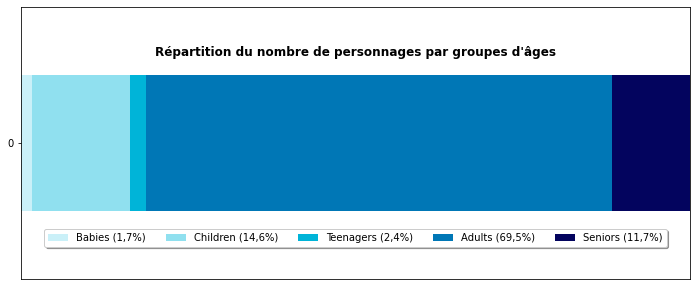

In [27]:
repartition_age[['percentage']].T.plot.barh(stacked=True, figsize=(12, 5), use_index=False, legend=True, color = ['#CAF0F8', '#90E0EF', '#00B4D8', '#0077B6', '#03045E'])

plt.xlim([0, 1])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)

ax = plt.subplot(111)
mylabels = ['Babies (1,7%)','Children (14,6%)','Teenagers (2,4%)', 'Adults (69,5%)', 'Seniors (11,7%)']
ax.legend(labels=mylabels, loc='lower center', bbox_to_anchor=(0.5, 0.1), ncol=5, fancybox=True, shadow=True)

plt.title("Répartition du nombre de personnages par groupes d'âges", x=0.5, y=0.8, fontweight="bold")

#plt.savefig('nb_gender.png')

plt.show()

## Nb de lignes de dialogue des persos

In [28]:
df_locations = pd.read_csv("simpsons_locations.csv")
df_locations

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home
...,...,...,...
4454,4455,SKOBO'S,skobo
4455,4456,FLANDERS' BASEMENT,flanders basement
4456,4457,CASINO FLOOR,casino floor
4457,4458,BURNED CHURCH,burned church


In [29]:
df_script_lines = pd.read_csv("simpsons_script_lines.csv")
df_script_lines

/var/folders/r7/nyn0pbkd469dh1skmjprpkt80000gn/T/ipykernel_3680/2260587107.py:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_script_lines = pd.read_csv("simpsons_script_lines.csv")


,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158266,9544,32,204,Miss Hoover: (OFF LISA'S REACTION) I'm back.,831000,true,464,3.0,Miss Hoover,Springfield Elementary School,I'm back.,im back,2
158267,9545,32,205,"Miss Hoover: You see, class, my Lyme disease t...",839000,true,464,3.0,Miss Hoover,Springfield Elementary School,"You see, class, my Lyme disease turned out to ...",you see class my lyme disease turned out to be,10
158268,9546,32,206,Miss Hoover: Psy-cho-so-ma-tic.,842000,true,464,3.0,Miss Hoover,Springfield Elementary School,Psy-cho-so-ma-tic.,psy-cho-so-ma-tic,1
158269,9547,32,207,Ralph Wiggum: Does that mean you were crazy?,844000,true,119,3.0,Ralph Wiggum,Springfield Elementary School,Does that mean you were crazy?,does that mean you were crazy,6


In [30]:
df_script_lines["episode_id"].value_counts()

228    395
1      377
231    376
271    375
28     367
      ... 
138    208
568    206
554    204
286    146
189     79
Name: episode_id, Length: 564, dtype: int64

In [31]:
# jusqu'à S26E16
df_script_lines["episode_id"].max()

568

In [32]:
characters_lines = df_script_lines
characters_lines['character_id'] = pd.to_numeric(df_script_lines['character_id'], errors="coerce").fillna(0)
characters_lines_values = characters_lines["character_id"].astype(int).value_counts()
characters_lines_values = characters_lines_values.drop(index=0)
characters_lines_values

2       30108
1       14265
8       13969
9       11641
15       3207
        ...  
4324        1
4325        1
1791        1
4328        1
3640        1
Name: character_id, Length: 6721, dtype: int64

In [33]:
df_characters_lines = characters_lines_values.to_frame()
df_characters_lines

,character_id
2,30108
1,14265
8,13969
9,11641
15,3207
...,...
4324,1
4325,1
1791,1
4328,1


In [34]:
df_characters_lines["character_id"].value_counts()[1]

3034

In [35]:
df_characters_lines_100 = df_characters_lines.head(100).copy()
df_characters_lines_100['id'] = df_characters_lines_100.index
df_characters_lines_100 = df_characters_lines_100.rename(columns={"character_id": "nb_lines"})
df_characters_lines_100 = df_characters_lines_100[['id', 'nb_lines']]
df_characters_lines_100

,id,nb_lines
2,2,30108
1,1,14265
8,8,13969
9,9,11641
15,15,3207
...,...,...
1197,1197,72
218,218,69
6190,6190,68
238,238,68


In [36]:
df_characters_merged = df_characters_lines_100.merge(df_characters, how='inner', on='id')
df_characters_merged

,id,nb_lines,name,normalized_name,gender
0,2,30108,Homer Simpson,homer simpson,m
1,1,14265,Marge Simpson,marge simpson,f
2,8,13969,Bart Simpson,bart simpson,m
3,9,11641,Lisa Simpson,lisa simpson,f
4,15,3207,C. Montgomery Burns,c montgomery burns,m
...,...,...,...,...,...
95,1197,72,George H.W. Bush,george hw bush,m
96,218,69,Director,director,m
97,6190,68,Dan Gillick,dan gillick,m
98,238,68,Marty,marty,m


In [37]:
df_characters_merged["gender"].value_counts()

m    72
f    19
Name: gender, dtype: int64

In [38]:
dict_lines = dict(zip(df_characters_merged["name"], df_characters_merged["nb_lines"]))

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import random

In [40]:
nb_lines_mask = np.array(Image.open('/Users/heloisevanrenterghem/Documents/THPprojets/Simpsons/donut.jpeg'))

In [41]:
def pink_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(324, 100%%, %50d%%)" % random.randint(40, 90) 

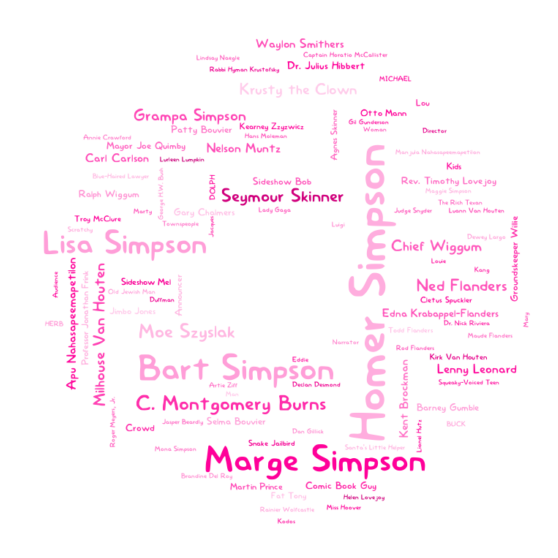

In [42]:
wordcloud = WordCloud(font_path = 'Homer_Simpson_Revised.ttf', width=3000, height=2000, background_color="white", mask=nb_lines_mask, colormap='spring').generate_from_frequencies(dict_lines)
wordcloud.recolor(color_func = pink_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('characters_nb_lines_wc.png')
plt.show()

## Mise en relation avec le classement des persos

In [44]:
df_characters_ranked = pd.read_csv("simpsons_characters_ranked.csv")
df_characters_ranked = df_characters_ranked.iloc[::-1].head(15)
df_characters_ranked

,rank,character
49,1,Marge Simpson
48,2,Homer Simpson
47,3,Lisa Simpson
46,4,Ned Flanders
45,5,Milhouse Van Houten
44,6,Seymour Skinner
43,7,Bart Simpson
42,8,Moe Syszlak
41,9,Apu Nahasapeemapetilon
40,10,Krusty the Clown


In [45]:
df_characters_ranked["character"] = df_characters_ranked["character"].str.strip()
df_characters_merged['name'] = df_characters_merged['name'].replace(['Moe Szyslak', 'Krusty the Clown', 'C. Montgomery Burns', 'Grampa Simpson', 'Edna Krabappel-Flanders'],['Moe Syszlak', 'Krusty the Clown', 'Charles Montgomery Burns', 'Abraham Simpson', 'Edna Krabappel'])

In [47]:
df_characters_rank_merged = df_characters_ranked.merge(df_characters_merged, how='left', left_on='character', right_on='name')
df_characters_rank_merged

,rank,character,id,nb_lines,name,normalized_name,gender
0,1,Marge Simpson,1,14265,Marge Simpson,marge simpson,f
1,2,Homer Simpson,2,30108,Homer Simpson,homer simpson,m
2,3,Lisa Simpson,9,11641,Lisa Simpson,lisa simpson,f
3,4,Ned Flanders,11,2145,Ned Flanders,ned flanders,m
4,5,Milhouse Van Houten,25,1911,Milhouse Van Houten,milhouse van houten,m
5,6,Seymour Skinner,3,2443,Seymour Skinner,seymour skinner,m
6,7,Bart Simpson,8,13969,Bart Simpson,bart simpson,m
7,8,Moe Syszlak,17,2864,Moe Syszlak,moe szyslak,m
8,9,Apu Nahasapeemapetilon,208,1006,Apu Nahasapeemapetilon,apu nahasapeemapetilon,m
9,10,Krusty the Clown,139,1789,Krusty the Clown,krusty the clown,m


In [51]:
df_characters_rank_merged['rank'] = df_characters_rank_merged['rank'].map(str)
df_characters_rank_merged['Personnage'] = df_characters_rank_merged['rank'] + ' - ' + df_characters_rank_merged['character']
df_characters_rank_merged_hist = df_characters_rank_merged[['Personnage', 'nb_lines']]
df_characters_rank_merged_hist = df_characters_rank_merged_hist.set_index('Personnage')
df_characters_rank_merged_hist

,nb_lines
Personnage,
1 - Marge Simpson,14265
2 - Homer Simpson,30108
3 - Lisa Simpson,11641
4 - Ned Flanders,2145
5 - Milhouse Van Houten,1911
6 - Seymour Skinner,2443
7 - Bart Simpson,13969
8 - Moe Syszlak,2864
9 - Apu Nahasapeemapetilon,1006


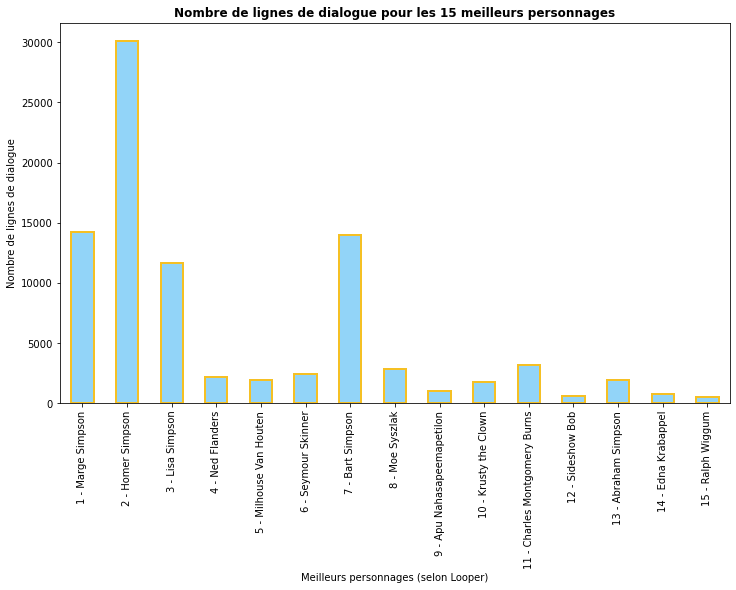

In [67]:
df_characters_rank_merged_hist.plot(kind='bar', figsize=(12, 7), legend=False, edgecolor='#F5C024', color="#92D4F8", linewidth=2)

plt.xlabel('Meilleurs personnages (selon Looper)')
plt.ylabel('Nombre de lignes de dialogue')

plt.title('Nombre de lignes de dialogue pour les 15 meilleurs personnages', x=0.5, y=1, fontweight="bold")

#plt.savefig('characters_nb_lines_rank.png')

plt.show()

## Les personnages du monde réel